# Car Price Prediction

In [123]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [124]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


### The following are the steps involved in building a model
- Data understanding
- Data cleaning
- Data preparation
- Model building and evaluation

## 1. Data Understanding 
Let's first have a look at the dataset and understand the data size, features etc.

In [125]:
# reading the dataset
cars = pd.read_csv("Cars_price.csv")

In [126]:
cars.info()
#summary: Dataset has 205 columns, 26 rows, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [127]:
#replacing column names with - to _ 
cars.columns = cars.columns.str.replace('-', '_')
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## 2. Data Cleaning

#### Symboling
Symboling can be a categorical as it has fixed and discrete entries.

In [128]:
cars.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [129]:
cars.symboling = cars.symboling.astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    object 
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

Im renaming make to car_company for my understanding

In [130]:
cars.rename(columns = {'make':'car_company'}, inplace=True)

In [131]:
cars.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [132]:
cars.head()

,symboling,normalized_losses,car_company,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450



Changing the dtype of the following columns to numeric
- normalized_losses
- bore 
- stroke 
- horsepower 
- peak_rpm    
- price 

#### normalized_losses

Since 41 is almost 20% of the data, Im converting '?' to Nan and then using mean method to replace it.

In [133]:
cars.normalized_losses.unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [134]:
#replacing '?' to NaN
cars.normalized_losses = cars['normalized_losses'].replace('?',np.nan)

In [135]:
#converting normalized_losses to numeric
cars.normalized_losses = pd.to_numeric(cars.normalized_losses)

In [136]:
cars.normalized_losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized_losses, dtype: float64

Since 20% of entires is nan I'm chooseing mean method to handle the inconsistent entries

In [137]:
#handling nan values with median of the column
Norm = cars["normalized_losses"].mean()
print(Norm)

cars["normalized_losses"].fillna(Norm, inplace=True)

122.0


#### bore

In [138]:
cars.bore.unique()

array(['3.47', '2.68', '3.19', '3.13', '3.5', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.6', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.8', '3.78',
       '3.17', '3.35', '3.59', '2.99', '3.33', '3.7', '3.61', '3.94',
       '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'], dtype=object)

In [139]:
#replacing '?' to NaN
cars.bore = cars['bore'].replace('?',np.nan)

In [140]:
#converting to numeric
cars.bore = pd.to_numeric(cars.bore)
cars['bore'].isna().sum()

4

In [141]:
#handling nan values with median of the column
bor = cars["bore"].median()
print(bor)
cars["bore"].fillna(bor, inplace=True)

3.31


#### stroke

In [142]:
cars.stroke.unique()

array(['2.68', '3.47', '3.4', '2.8', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.9', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.1', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.9', '2.07', '2.36', '2.64',
       '3.08', '3.5', '3.54', '2.87'], dtype=object)

In [143]:
#replacing '?' to NaN
cars.stroke = cars['stroke'].replace('?',np.nan)

In [144]:
#converting to numeric
cars.stroke = pd.to_numeric(cars.stroke)
cars['stroke'].isna().sum()

4

In [145]:
#handling nan values with median of the column
sor = cars["stroke"].median()
print(sor)
cars["stroke"].fillna(sor, inplace=True)

3.29


#### horsepower

In [146]:
cars.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [147]:
#index no of enties with ?
print(cars[cars['horsepower'] == '?'].index.values)

[130 131]


In [148]:
cars=cars.drop(index=[130,131])

In [149]:
#converting to numeric
cars.horsepower = pd.to_numeric(cars.horsepower)
cars.horsepower.info()

<class 'pandas.core.series.Series'>
Int64Index: 203 entries, 0 to 204
Series name: horsepower
Non-Null Count  Dtype
--------------  -----
203 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


#### peak_rpm

In [150]:
cars.peak_rpm.unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5750', '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

In [151]:
#converting to numeric
cars.peak_rpm = pd.to_numeric(cars.peak_rpm)
cars.peak_rpm.info()

<class 'pandas.core.series.Series'>
Int64Index: 203 entries, 0 to 204
Series name: peak_rpm
Non-Null Count  Dtype
--------------  -----
203 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


#### price

In [152]:
cars.price.unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [153]:
#index no of entries with ?
print(cars[cars['price']=='?'].index.values)

[  9  44  45 129]


Since only 4 out of 205 entries are inconsistent, I'm dropping the 4 rows

In [154]:
#dropping 4 rows
cars=cars.drop(index= [9,44,45,129])

In [155]:
#converting to numeric
cars.price = pd.to_numeric(cars.price)
cars.price.info()

<class 'pandas.core.series.Series'>
Int64Index: 199 entries, 0 to 204
Series name: price
Non-Null Count  Dtype
--------------  -----
199 non-null    int64
dtypes: int64(1)
memory usage: 3.1 KB


## 3. Data Visualisation

#### Now lets understand the Numerical features in the dataset

In [156]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


Now lets observe the linear relationship of quantitative data

In [157]:
# correlation
cor = cars_numeric.corr()
cor

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
normalized_losses,1.000000,-0.056718,0.019443,0.086846,-0.375740,0.099413,0.112369,-0.031187,0.058181,-0.114791,0.217300,0.239544,-0.225147,-0.181879,0.134140
wheel_base,-0.056718,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.497322,0.169609,0.249088,0.371621,-0.360593,-0.472877,-0.543647,0.583797
length,0.019443,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.608921,0.117359,0.161486,0.580309,-0.286321,-0.664865,-0.699033,0.693965
width,0.086846,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.544366,0.186165,0.191254,0.615315,-0.245975,-0.633139,-0.681131,0.753871
height,-0.375740,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.185987,-0.058224,0.259914,-0.087407,-0.311574,-0.051387,-0.105200,0.134990
curb_weight,0.099413,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.645598,0.171884,0.156294,0.758063,-0.279375,-0.750287,-0.794937,0.835090
engine_size,0.112369,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.574625,0.204845,0.029366,0.822713,-0.256773,-0.650552,-0.679688,0.873887
bore,-0.031187,0.497322,0.608921,0.544366,0.185987,0.645598,0.574625,1.000000,-0.066961,0.003337,0.567223,-0.270494,-0.579423,-0.590542,0.546600
stroke,0.058181,0.169609,0.117359,0.186165,-0.058224,0.171884,0.204845,-0.066961,1.000000,0.199273,0.100260,-0.061137,-0.030520,-0.038864,0.093610
compression_ratio,-0.114791,0.249088,0.161486,0.191254,0.259914,0.156294,0.029366,0.003337,0.199273,1.000000,-0.214576,-0.436015,0.330587,0.268819,0.069549


We can visualise the muliple correlation from heatmap

<AxesSubplot:>

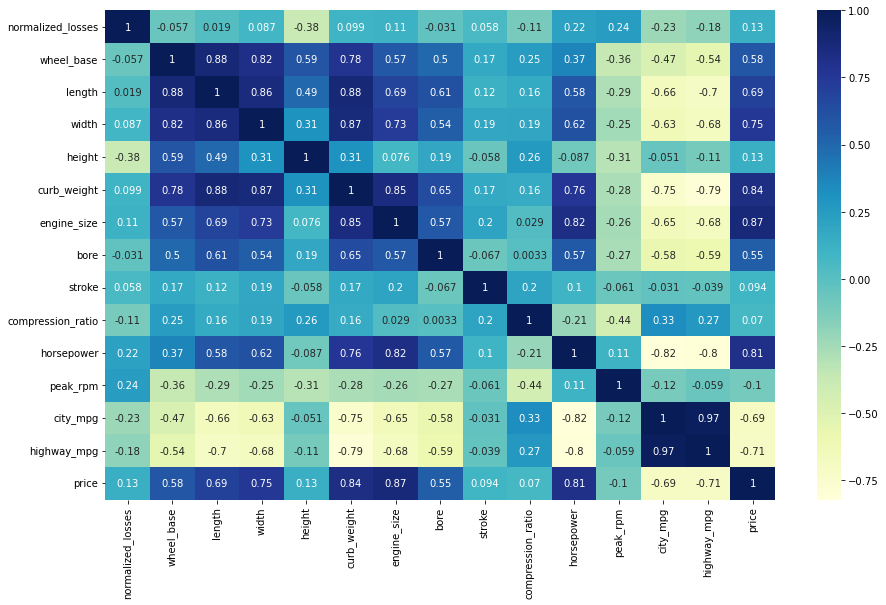

In [158]:
# plotting correlations on a heatmap

#figure size
plt.figure(figsize=(15,9))

#heatmap
sns.heatmap(cor, cmap='YlGnBu', annot=True)

Correlation of price with independent variables

- Price is positively correlated (0.8 approximately) with wheel_base, length, width, curb_weight, engine_size, horsepower.   
- Price is negatively correlated (-0.7 approximately) city_mpg and highway_mpg. 

Note: Many independent varaible are highly correlated with other variables. For example wheel_base, length, width, curb_weight, engine_size etc. are all measures of 'size/weight', and are positively correlated. So we'll have to pay attention to multicollinearity.

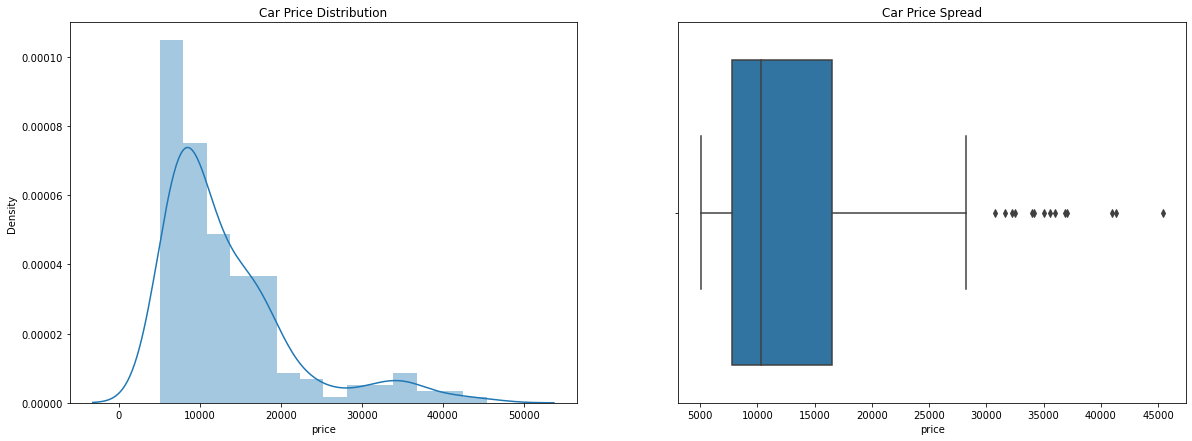

In [159]:
#Visualing price 

#figure size
plt.figure(figsize=(20,7))

#subplots
plt.subplot(1,2,1)
plt.title("Car Price Distribution")
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(cars.price)

plt.show()

In [160]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      199.000000
mean     13243.432161
std       7978.707609
min       5118.000000
25%       7775.000000
50%      10345.000000
75%      16501.500000
85%      18480.000000
90%      22501.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


Inference:

- The boxplot is right skewed meaning that most of the values falls under 15000.
- The data points are far spread out form the mean, which indicate the high variance in the price. 85% of the prices are below 18500 whereas 15% of the prices are between 18500 and 45400.

## 4. Data Preparation

Lets prepare the data to build a model

In [161]:
# split into X and y
X = cars.loc[:, ['symboling', 'normalized_losses', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg',
       'car_company']]

y = cars['price']

In [162]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [163]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fuel_type_gas,aspiration_turbo,num_of_doors_four,num_of_doors_two,body_style_hardtop,...,car_company_mitsubishi,car_company_nissan,car_company_peugot,car_company_plymouth,car_company_porsche,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [165]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [166]:
# split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

## 5. Model Building

In [167]:
# Building the linear regression model with all the features

lr = LinearRegression()

# fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [168]:
# print coefficients
print(lr.coef_)

[-8.20497228e+00  2.53351343e+02 -1.63473351e+02  6.35294904e+02
 -2.96741928e+02  5.54948293e+00  1.27691615e+02 -8.50463122e+03
 -2.91573809e+03 -6.98764906e+02  1.67793095e+01  9.52324311e-01
 -1.12141239e+02  1.30281094e+02  1.68079449e+03  1.86500169e+03
  1.65645524e+03  3.12033179e+02  1.55962919e+03 -6.35168993e+03
  1.28861549e+03  1.51612965e+02 -4.06096548e+02  1.21033874e+03
 -1.44065988e+03 -8.76609297e+02 -1.50242466e+03 -3.26283086e+02
  1.84503471e+03 -4.79758455e-11  2.15017525e+03 -2.66193448e+01
  2.70744845e+01 -2.46018001e+03  4.71145222e+03 -1.07580824e+03
  3.39942757e+03 -1.84035440e+03  8.52811391e+03 -9.62531992e+03
  4.71145222e+03  4.02216554e+03  2.61514481e+03  6.35168993e+03
  2.40712839e+03  2.90352665e+03  4.99007031e+02  5.94983246e+03
  5.33438431e+03  7.53806474e+03 -2.37857517e+03 -3.04784248e+03
  2.31704926e+03 -3.27685798e+03  6.01820928e+02 -2.14589282e+02
  3.23978699e+03 -2.10420455e+03 -1.51311822e+03  3.45429865e+02
 -6.37793866e+03 -2.82078

In [169]:
# print intercept
print(lr.intercept_)

-2939.072596088399


## 6.Model Evaluation 

In [170]:
# predict 
y_pred = lr.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.8205227369459526


### Model Building Using RFE
Due to Multicollinearity among variables the above linear model may not be accurate enough. So Let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features, and then use the statsmodels library to build models using the shortlisted features (this is also because sklearn doesn't have adjusted r-squared, statsmodels has).

In [171]:
# RFE with 10 features
from sklearn.feature_selection import RFE
lr = LinearRegression()
lr.fit(X_train,y_train)
Final_Model = RFE(lr, n_features_to_select=10)
Final_Model = Final_Model.fit(X_train, y_train)
# making predictions using rfe model
y_pred = Final_Model.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.7566778758344597


### RFE Model Evaluation

Lets check the columns selected bt rfe_10 and rfe_5

The RFE() method returns a "support_" array of variables considered important:

If support_ == True: Important variable

If support_ == False: Not important variable

In [172]:
for z in range(len(X_train.columns)):
    print(X_train.columns[z],'\t\t\t',Final_Model.support_[z])

normalized_losses 			 False
wheel_base 			 False
length 			 False
width 			 False
height 			 False
curb_weight 			 False
engine_size 			 False
bore 			 False
stroke 			 False
compression_ratio 			 False
horsepower 			 False
peak_rpm 			 False
city_mpg 			 False
highway_mpg 			 False
symboling_-1 			 False
symboling_0 			 False
symboling_1 			 False
symboling_2 			 False
symboling_3 			 False
fuel_type_gas 			 False
aspiration_turbo 			 False
num_of_doors_four 			 False
num_of_doors_two 			 False
body_style_hardtop 			 False
body_style_hatchback 			 False
body_style_sedan 			 False
body_style_wagon 			 False
drive_wheels_fwd 			 False
drive_wheels_rwd 			 False
engine_location_rear 			 False
engine_type_l 			 False
engine_type_ohc 			 False
engine_type_ohcf 			 False
engine_type_ohcv 			 False
engine_type_rotor 			 False
num_of_cylinders_five 			 True
num_of_cylinders_four 			 True
num_of_cylinders_six 			 False
num_of_cylinders_three 			 True
num_of_cylinders_twelve 			 False
num_of_cy

In [173]:

X_train_rfe10 = X_train[X_train.columns[Final_Model.support_]]
for x in X_train_rfe10:
    print(x)

num_of_cylinders_five
num_of_cylinders_four
num_of_cylinders_three
num_of_cylinders_two
car_company_audi
car_company_bmw
car_company_jaguar
car_company_mercedes-benz
car_company_porsche
car_company_saab


In [174]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    df = pd.DataFrame(vif.VIF)
    display(vif)

In [175]:
X_train_new = checkVIF(X_train_rfe10)

,Features,VIF
0,num_of_cylinders_five,2.70
4,car_company_audi,2.26
7,car_company_mercedes-benz,1.45
1,num_of_cylinders_four,1.05
9,car_company_saab,1.03
5,car_company_bmw,1.01
8,car_company_porsche,1.01
2,num_of_cylinders_three,1.00
3,num_of_cylinders_two,1.00
6,car_company_jaguar,1.00


VIF > **5**, there is an indication that multicollinearity may be present, but not enough to worry.

VIF > **10**, there is certainly a multicollinearity among the variables.

In [176]:
# results 
r2_score(y_test, y_pred)

0.7566778758344597

In [177]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
y_pred = Final_Model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae

3422.6372987172304

In [178]:
df = pd.DataFrame({"act_val":y_test,"pred_val":y_pred})
df["diff"] = df["pred_val"]-df["act_val"]
df

,act_val,pred_val,diff
132,11850,16112.500000,4262.500000
107,11900,9705.391055,-2194.608945
102,14399,18218.694216,3819.694216
95,7799,9705.391055,1906.391055
114,17075,9705.391055,-7369.608945
172,17669,9705.391055,-7963.608945
119,7957,9705.391055,1748.391055
99,8949,9705.391055,756.391055
55,10945,13711.666667,2766.666667
72,35056,38169.542027,3113.542027


In [179]:
#mean squared error
from sklearn.metrics import mean_squared_error
y_pred = Final_Model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

21505607.775683057

In [180]:
df["square"] = np.square((df["diff"]))
df

,act_val,pred_val,diff,square
132,11850,16112.500000,4262.500000,1.816891e+07
107,11900,9705.391055,-2194.608945,4.816308e+06
102,14399,18218.694216,3819.694216,1.459006e+07
95,7799,9705.391055,1906.391055,3.634327e+06
114,17075,9705.391055,-7369.608945,5.431114e+07
172,17669,9705.391055,-7963.608945,6.341907e+07
119,7957,9705.391055,1748.391055,3.056871e+06
99,8949,9705.391055,756.391055,5.721274e+05
55,10945,13711.666667,2766.666667,7.654444e+06
72,35056,38169.542027,3113.542027,9.694144e+06


Text(0.5, 0, 'Errors')

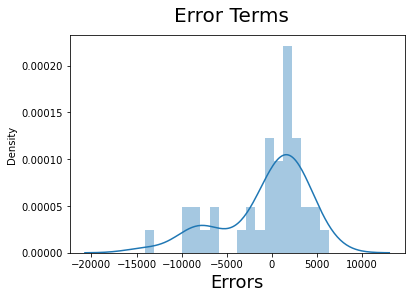

In [184]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((df["diff"]), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 